## Лабораторная работа 4.3.1

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp
import tikzplotlib as tikz

In [25]:
def csvtotex(input, output, columns=None, rows=[-1], type=None, transp=False):
    df = pd.read_csv(input, sep=",", usecols=columns, quotechar='"', dtype=type)
    df = df[df.index.isin(rows)]
    if transp:
        df = df.transpose()
        pd.DataFrame.to_csv(df, output, sep="&", index=True)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in rows: data.write("|l")
            data.write("|l|}")
            data.write("\hline")
            content.pop(0)
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    else:
        pd.DataFrame.to_csv(df, output, sep="&", index=False)
        with open(output, "r") as data:
            content = data.readlines()
        with open(output, "w") as data:
            data.write("\\begin{tabular}{")
            for c in columns: data.write("|l")
            data.write("|}")
            data.write("\hline")
            for str in content:
                data.write(str)
                data.write("\\\\")
                data.write("\hline")
            data.write("\end{tabular}")
    return df

In [26]:
def print_err(a, a_err, vis=True):
    a = np.array([a]).flatten()
    a_err = np.array([a_err]).flatten()
    val = np.zeros_like(a)
    sig = np.zeros_like(a_err)
    for i in range(a.size):
        val[i] = np.round(a[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        sig[i] = np.round(a_err[i], decimals = round(1 * (np.trunc(np.log10(a_err[i]) < 0)) - np.trunc(np.log10(a_err[i]))))
        if vis: print(val[i], '\pm', sig[i])
    return val, sig

In [27]:
def T(n, x):
    return np.cos(n * np.arccos(x))

In [28]:
data = pd.read_csv('../data/data.csv')

>### Дифракция Френеля

In [29]:
df = csvtotex('../data/data.csv', '../data/table1.tex', columns=range(2, 4), rows=range(6), transp=False)
df

,"$z$, мм",$m$
0,618.0,1
1,621.0,2
2,623.0,3
3,625.0,4
4,626.0,5
5,630.0,$\infty$


In [30]:
b = data[data.columns[4]].values[0] * 0.02
b_err = 1 * 0.02
print_err(b, b_err)

0.24 \pm 0.02


(array([0.24]), array([0.02]))

In [31]:
z = df['$z$, мм'][5] - df['$z$, мм'][:5]
n = 1 + np.array(df['$m$'][:5], dtype=int)
z_err = b_err * 2 ** 0.5
lam = 578 * 10 ** (-6)
xi = (z * n * lam) ** 0.5
xi_err = 0.5 * z_err / z * xi

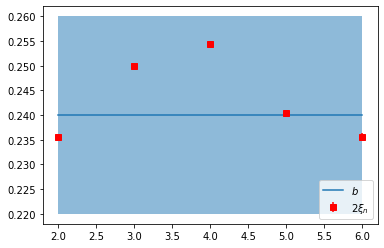

In [32]:
plt.errorbar(n, 2 * xi, yerr=2 * xi_err, fmt='rs', label='$2\\xi_n$')
plt.fill_between(n, np.full(5, b - b_err), np.full(5, b + b_err), alpha=0.5)
plt.plot(n, np.full(5, b), label='$b$')
plt.legend(loc='lower right')
#tikz.save('plot1.tex')

In [33]:
df['$n$'] = np.hstack((n, '$\\infty$'))
df['$2\\xi_n$, мм'] = np.hstack(([str(i) + '$\\pm$' + str(j) for i, j in np.array(print_err(2 * xi, 2* xi_err, vis=False)).T], '-'))
df.to_csv('../data/count1.csv', index=False)

In [34]:
csvtotex('../data/count1.csv', '../data/table1.tex', columns=range(0, 4), rows=range(6), transp=False)

,"$z$, мм",$m$,$n$,"$2\xi_n$, мм"
0,618.0,1,2,0.2356$\pm$0.0003
1,621.0,2,3,0.2498$\pm$0.0004
2,623.0,3,4,0.2544$\pm$0.0005
3,625.0,4,5,0.2404$\pm$0.0007
4,626.0,5,6,0.2356$\pm$0.0008
5,630.0,$\infty$,$\infty$,-


>### Дифракция Фраунгофера на щели

In [35]:
df = csvtotex('../data/data.csv', '../data/table2.tex', columns=range(7, 9), rows=range(8), transp=True)
df

,0,1,2,3,4,5,6,7
"$x$, дел",8,25,36,52,-8,-24,-36,-53
$m $,1,2,3,4,-1,-2,-3,-4


In [36]:
b = data[data.columns[9]].values[0]
b_err = 1
print_err(b, b_err)

312.0 \pm 1


(array([312.]), array([1]))

In [37]:
x = df.T[df.T.columns[0]].values * 0.02
x_err = 1 * 0.02
m = df.T[df.T.columns[1]]

In [38]:
def fit(x, p):
    return x*p

In [39]:
k, k_err = sp.curve_fit(fit, m, x)
print_err(lam * 155 / k * 1000, lam * 155 / k * k_err / k  * 1000)

358.36 \pm 0.08


(array([358.36]), array([0.08]))

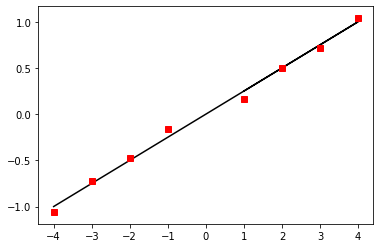

In [40]:
plt.errorbar(m, x, x_err, fmt='rs')
plt.plot(m, k * m, 'black')
#tikz.save('plot2.tex')

>### Дифракция Фраунгофера на двух щелях

In [41]:
b = data[data.columns[13]].values[0]
b_err = 1
print_err(b, b_err)
X = data[data.columns[11]].values[0] * 0.02
X_err = 1 * 0.02
print_err(X, X_err)
m = data[data.columns[12]].values[0]
print(m)

121.0 \pm 1
1.44 \pm 0.02
20.0


In [42]:
d_x = X / m
d_x_err = X_err / m
print_err(d_x, d_x_err)
d = 155 * lam / d_x
d_err = d * d_x_err / d_x
print_err(d, d_err)

0.072 \pm 0.001
1.24 \pm 0.02


(array([1.24]), array([0.02]))

In [43]:
n = np.trunc(2 * d * 1000 / b)
print(n)

20.0


In [44]:
b_0 = data[data.columns[14]].values[0]
b_0_err = 1
print_err(b_0, b_0_err)

47.0 \pm 1


(array([47.]), array([1]))

>### Влияние дифракции на разрешающую способность оптического инструмента

In [45]:
b1, b2, d = data[data.columns[19:23]].values[0] * 0.02
err = 1 * 0.02
print_err(b1, err)
print_err(b2, err)
print_err(d, err)

0.16 \pm 0.02
0.26 \pm 0.02
1.26 \pm 0.02


(array([1.26]), array([0.02]))

In [46]:
b_0 = lam * 110 / d
b_0_err = b_0 * err / d
print_err(b_0, b_0_err)

0.0505 \pm 0.0008


(array([0.0505]), array([0.0008]))